Initially I will use pythons urllib package to go into individual pages and pick data

In [26]:
import urllib.request

from bs4 import BeautifulSoup
import re

x = urllib.request.urlopen('https://en.wikipedia.org/wiki/List_of_dinosaur_genera')
#print(x.read())
base_string='https://en.wikipedia.org'

soup = BeautifulSoup(x.read())

#cities = soup.find_all('i', {'class' : 'city-sh'})
cities = soup.find_all('i')
dino_list=[]
for city in cities:
    #print(city)
    dino_dict=[]
    for a in city.find_all('a', href=True):
        #print(a['href'])
        #print(a['title'])
        dino_dict.append(a['title'])
        page_link=base_string + a['href']
        dino_dict.append(page_link)
        #dino_dict[a['title']]= base_string + a['href']
        dino_list.append(dino_dict)
        
        
for d in dino_list:
    print(d)

C:\Users\sugat\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\sugat\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


['Tyrannosaurus', 'https://en.wikipedia.org/wiki/Tyrannosaurus']
['Apatosaurus', 'https://en.wikipedia.org/wiki/Apatosaurus']
['Nomen dubium', 'https://en.wikipedia.org/wiki/Nomen_dubium']
['Nomen nudum', 'https://en.wikipedia.org/wiki/Nomen_nudum']
['Nomina dubia', 'https://en.wikipedia.org/wiki/Nomina_dubia']
['Tyrannosaurus', 'https://en.wikipedia.org/wiki/Tyrannosaurus']
['Nomen nudum', 'https://en.wikipedia.org/wiki/Nomen_nudum']
['Nomen oblitum', 'https://en.wikipedia.org/wiki/Nomen_oblitum']
['Nomen dubium', 'https://en.wikipedia.org/wiki/Nomen_dubium']
['Hadrosaurus', 'https://en.wikipedia.org/wiki/Hadrosaurus']
['Allosaurus', 'https://en.wikipedia.org/wiki/Allosaurus']
['Aachenosaurus', 'https://en.wikipedia.org/wiki/Aachenosaurus']
['Aardonyx', 'https://en.wikipedia.org/wiki/Aardonyx']
['Abdallahsaurus', 'https://en.wikipedia.org/wiki/Abdallahsaurus']
['Giraffatitan', 'https://en.wikipedia.org/wiki/Giraffatitan']
['Abelisaurus', 'https://en.wikipedia.org/wiki/Abelisaurus']
['

In [88]:
!pip install wikipedia


total_docs = []

import wikipedia

for one_dino_page in dino_list[:]:
    print(one_dino_page[1])
    new_page_list = []
    #y = urllib.request.urlopen(one_dino_page[1])
    #soup = BeautifulSoup(y.read())
    p = wikipedia.page(one_dino_page[0])
    #print(p.content)
    new_page_list.append(one_dino_page[0])
    new_page_list.append(p.content)
    total_docs.append(new_page_list)
    
print(len(total_docs))
#for w in total_docs:
#    print(w)

https://en.wikipedia.org/wiki/Tyrannosaurus


notebook 5.4.0 requires ipykernel, which is not installed.
jupyter 1.0.0 requires ipykernel, which is not installed.
jupyter-console 5.2.0 requires ipykernel, which is not installed.
ipywidgets 7.1.1 requires ipykernel>=4.5.1, which is not installed.
You are using pip version 10.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


https://en.wikipedia.org/wiki/Apatosaurus
https://en.wikipedia.org/wiki/Nomen_dubium
https://en.wikipedia.org/wiki/Nomen_nudum
https://en.wikipedia.org/wiki/Nomina_dubia
https://en.wikipedia.org/wiki/Tyrannosaurus
https://en.wikipedia.org/wiki/Nomen_nudum
https://en.wikipedia.org/wiki/Nomen_oblitum
https://en.wikipedia.org/wiki/Nomen_dubium
https://en.wikipedia.org/wiki/Hadrosaurus
https://en.wikipedia.org/wiki/Allosaurus
https://en.wikipedia.org/wiki/Aachenosaurus
https://en.wikipedia.org/wiki/Aardonyx
https://en.wikipedia.org/wiki/Abdallahsaurus
https://en.wikipedia.org/wiki/Giraffatitan
https://en.wikipedia.org/wiki/Abelisaurus
https://en.wikipedia.org/wiki/Abrictosaurus
https://en.wikipedia.org/wiki/Abrosaurus
https://en.wikipedia.org/wiki/Abydosaurus
https://en.wikipedia.org/wiki/Acantholipan
https://en.wikipedia.org/wiki/Acanthopholis
https://en.wikipedia.org/wiki/Achelousaurus
https://en.wikipedia.org/wiki/Acheroraptor
https://en.wikipedia.org/wiki/Achillesaurus
https://en.wikip

C:\Users\sugat\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\sugat\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


DisambiguationError: "anatolian" may refer to: 
Anatolia
Anatolians
Anatolian High School
Anatolian Plate
Anatolian hieroglyphs
Anatolian languages
Anatolian rock
All pages beginning with Anatolian
All pages with a title containing Anatolian
All pages with a title containing anatolica
Anadolu (disambiguation)
Anatolia (disambiguation)

In [89]:
import nltk
from nltk.corpus import stopwords
import re, string, timeit


def cleanupDoc(s):
     stopset = set(stopwords.words('english'))
     tokens = nltk.word_tokenize(s)
     cleanup = " ".join(filter(lambda word: word not in stopset, s.split()))
     exclude = set(string.punctuation)
     cleanup = ''.join(ch for ch in cleanup if ch not in exclude)
     return cleanup.lower()

raw_documents = []
for k in total_docs:
    #print(k[1])
    cleaned = cleanupDoc(k[1])
    #print(cleaned)
    k[1]=cleaned
    raw_documents.append(k[1])

print(len(raw_documents))

106


In [91]:
from sklearn.feature_extraction.text import CountVectorizer
# use a custom stopwords list, set the minimum term-document frequency to 20
vectorizer = CountVectorizer(stopwords, min_df = 4)
A = vectorizer.fit_transform(raw_documents)
print( "Created %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )

Created 106 X 3275 document-term matrix


In [92]:
terms = vectorizer.get_feature_names()
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 3275 distinct terms


Applying Term Weighting with TF-IDF
We can improve the usefulness of the document-term matrix by giving more weight to the more "important" terms. The most common normalisation is term frequency–inverse document frequency (TF-IDF). In Scikit-learn, we can generate at TF-IDF weighted document-term matrix by using TfidfVectorizer in place of CountVectorizer.

A simple characterisation that we might do would be to look at the terms with the highest TF-IDF scores across all documents in the document-term matrix. We can define such a function as follows:

In [93]:
import operator
def rank_terms( A, terms ):
    # get the sums over each column
    sums = A.sum(axis=0)
    # map weights to the terms
    weights = {}
    for col, term in enumerate(terms):
        weights[term] = sums[0,col]
    # rank the terms by their weight over all documents
    return sorted(weights.items(), key=operator.itemgetter(1), reverse=True)

In [94]:
ranking = rank_terms( A, terms )
for i, pair in enumerate( ranking[0:20] ):
    print( "%02d. %s (%.2f)" % ( i+1, pair[0], pair[1] ) )

01. the (1585.00)
02. species (728.00)
03. found (651.00)
04. in (545.00)
05. formation (539.00)
06. known (519.00)
07. also (486.00)
08. skull (486.00)
09. name (480.00)
10. genus (461.00)
11. specimen (428.00)
12. dinosaur (427.00)
13. bones (417.00)
14. it (399.00)
15. vertebrae (393.00)
16. tyrannosaurus (353.00)
17. may (342.00)
18. this (337.00)
19. dinosaurs (330.00)
20. two (330.00)


saving this document-term matrix, terms, and snippets for topic modelling later using *Joblib*.

In [95]:
joblib.dump((A,terms,raw_documents), "articles-tfidf.pkl") 

['articles-tfidf.pkl']

NMF Topic Models
Topic modelling aims to automatically discover the hidden thematic structure in a large corpus of text documents. One approach for topic modelling is to apply matrix factorisation methods, such as Non-negative Matrix Factorisation (NMF). In this notebook we look at how to apply NMF using the scikit-learn library in Python.

First,i will load the TF-IDF normalised document-term matrix and list of terms that we stored earlier using *Joblib*:

In [96]:
from sklearn.externals import joblib
(A,terms,snippets) = joblib.load( "articles-tfidf.pkl" )
print( "Loaded %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )

Loaded 106 X 3275 document-term matrix


The key input parameter to NMF is the number of topics to generate *k*. For the moment, we will pre-specify a guessed value, for demonstration purposes.

In [123]:
k = 3

Another choice for NMF revolves around initialisation. Most commonly, NMF involves using random initialisation to populate the values in the factors W and H. Depending on the random seed that you use, you may get different results on the same dataset. Instead, using SVD-based initialisation provides more reliable results.

In [124]:
# create the model
from sklearn import decomposition
model = decomposition.NMF( init="nndsvd", n_components=k ) 
# apply the model and extract the two factor matrices
W = model.fit_transform( A )
H = model.components_

In [125]:
W.shape

(106, 3)

In [126]:
H.shape

(3, 3275)

For instance, for the term "dinosaur", we see the strenght of association with multiple topics.As we see below that term dinosaur is very closely related to topic 1 compared to topic 2 and 3. So words occuring in topic 1 will be very closely related to dinosaur and will indicate its occurance.

In [130]:
term_index = terms.index('dinosaur')
# round to 2 decimal places for display purposes
H[:,term_index].round(2)

array([3.71, 1.12, 0.66])

In [131]:
import numpy as np
def get_descriptor( terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
    return top_terms

In [132]:
descriptors = []
for topic_index in range(k):
    descriptors.append( get_descriptor( terms, H, topic_index, 20 ) )
    str_descriptor = ", ".join( descriptors[topic_index] )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topic 01: the, species, name, formation, found, dinosaur, known, genus, specimen, it, skull, in, vertebrae, also, two, named, dinosaurs, would, bones, apatosaurus
Topic 02: tyrannosaurus, the, rex, found, may, in, also, study, species, would, bones, large, bone, like, dinosaurs, tissue, evidence, known, years, tons
Topic 03: allosaurus, the, species, skull, bones, found, large, may, bone, specimen, prey, morrison, genus, theropods, also, teeth, remains, based, it, theropod


 We can represent the distribution of the weights for the top terms in a topic using a matplotlib horizontal bar chart.

In [134]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

def plot_top_term_weights( terms, H, topic_index, top ):
    # get the top terms and their weights
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    top_terms = []
    top_weights = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
        top_weights.append( H[topic_index,term_index] )
    # note we reverse the ordering for the plot
    top_terms.reverse()
    top_weights.reverse()
    # create the plot
    fig = plt.figure(figsize=(13,8))
    # add the horizontal bar chart
    ypos = np.arange(top)
    ax = plt.barh(ypos, top_weights, align="center", color="red",tick_label=top_terms)
    plt.xlabel("Term Weight",fontsize=14)
    plt.tight_layout()
    plt.show()

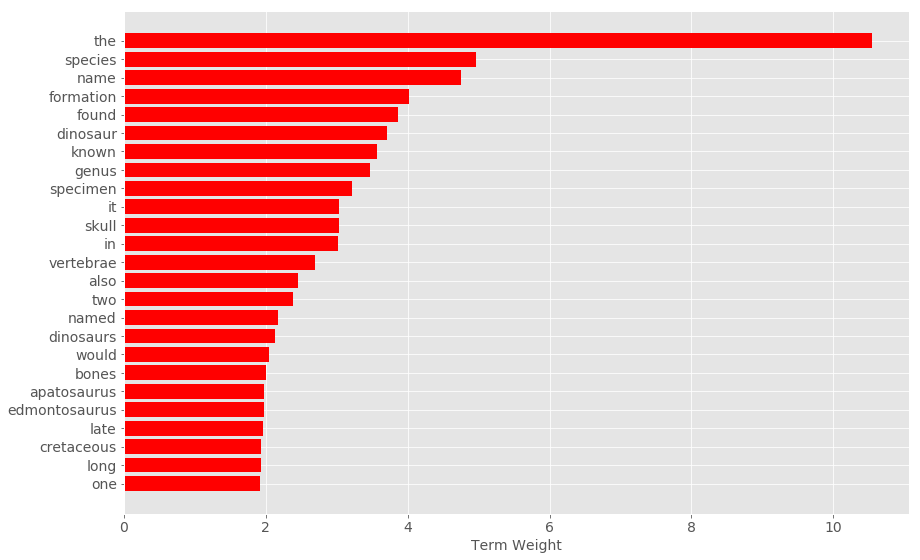

In [140]:
plot_top_term_weights( terms, H, 0, 25 )
# so in this case top 25 words related to dinosaurs

# Most Relevant Documents
We can also look at the snippets for the top-ranked documents for each topic. We'll define a function to produce this ranking also.

In [151]:
def get_top_snippets( all_snippets, W, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( W[:,topic_index] )[::-1]
    # now get the snippets corresponding to the top-ranked indices
    top_snippets = []
    for doc_index in top_indices[0:top]:
        try:
            top_snippets.append( all_snippets[doc_index] )
        except:
            continue
    return top_snippets

For instance, for the first topic listed above, the top 20 documents are:

In [152]:
results = get_top_snippets( raw_documents, W, 0, 20 )
for i, sni in enumerate(results):
    print("%02d. %s" % ( (i+1), sni ) )

01. this list informally named dinosaurs listing dinosaurs excluding aves birds extinct relatives never given formally published scientific names this list includes names properly published unavailable names since published valid name the following types names present list latin naked name nomen nudum a name appeared print yet formally published standards international commission zoological nomenclature nomina nuda the plural form invalid therefore italicized proper generic name would be latin manuscript name nomen manuscriptum a name appears manuscript formal notpeerreviewed publication scientific backing a nomen manuscriptum equivalent nomen nudum everything except method publication description nicknames descriptive names given specimens taxa researchers press  a   airakoraptor  airakoraptor informal name given genus dromaeosaurian theropod upper cretaceous mongolia the nomen nudum accidentally created perle et al 1992 citation paper called morphology dromaeosaurian dinosaurairakora

# TEST CASE

In order to run a simple test in above case, I will create a list with 5 different documents and then lets find top 3 docs which are most closely related to dinosaurs.

In [161]:
test_case = ['the big carnivor could even eat humans and fly in sky.','they were massive in size and numbers before humans came',\
            'the dinosaurs had huge skull double the size of a any specimen found in vertebrae','i love coding','i like to go out on vacation']

results = get_top_snippets( test_case, W, 0, 10)
for i, sni in enumerate(results):
    print("%02d. %s" % ( (i+1), sni ) )

01. they were massive in size and numbers before humans came
